# Table of Contents:

1. Introduction

2. Data Import

3. Rating Distribution

4. Map Visualization
A. North America and Europe
B. City View (Las Vegas, Phoenix)

5. In-depth Review Analysis
A. Top 10 Reviewers
B. Tracking Top-rated Users
C. Sentiment Analysis

6. Check-in Data

7. User Network (Relationship, Global Graph)

8. Conclusion

# Introduction

Yelp is a company that provides crowdsourced reviews of local businesses and online reservation services. Founded in 2004 by former PayPal employees, Yelp allows users to rate and review various types of local businesses on its platform, including restaurants, cafés, hotels, and shops. Users can search and view other users’ ratings and reviews on Yelp to better understand these businesses and make more informed consumption decisions.

The Yelp review dataset consists of a rich collection of review information gathered from the Yelp platform, including ratings, review texts, user information, and business information. By analyzing these data, one can gain deeper insights into users’ evaluations of different types of businesses, discover valuable information such as user preferences and business advantages, and thereby provide constructive suggestions and recommendations for local businesses and users.

This project aims to analyze the Yelp review dataset to explore underlying trends, patterns, and relationships. By applying data analysis, statistics, and network analysis methods, we seek to discover valuable information from the data and present the results through visualization. Such analysis enables a deeper understanding of user behavior, business conditions, and social network dynamics within the Yelp dataset, therefore offering better services and recommendations for both the Yelp platform and its users.

# Data Import

The datasets that are being used include the following:
### yelp_tip.csv ###

This dataset contains information about small tips posted by Yelp users on business pages. The dataset typically includes the following fields:

1. user_id: ID of the user who posted the tip
2. business_id: ID of the business associated with the tip
3. text: Text content of the tip
4. date: Date when the tip was posted
5. compliment_count: Number of compliments the tip received
6. type: Data type, usually "tip"
7. cool: Number of “cool” votes from other users
8. funny: Number of “funny” votes from other users
9. useful: Number of “useful” votes from other users

This dataset records user-generated tips about local businesses on Yelp, including user ID, business ID, tip text, submission date, number of compliments, and votes received. These data can be used to analyze user behavior and preferences, helping businesses and Yelp optimize their platforms.

### yelp_business.csv ###

This dataset contains business information on Yelp. It typically includes the following fields:

1. business_id: Unique business identifier
2. name: Business name
3. address: Business address
4. city: Business city
5. state: Business state
6. postal_code: Postal code
7. latitude: Latitude of the business
8. longitude: Longitude of the business
9. stars: Average rating (1 to 5 stars)
10. review_count: Number of reviews
11. is_open: Whether the business is currently open (0 = closed, 1 = open)
12. categories: Business categories, may include multiple values
13. attributes: Various business attributes in key-value format
14. hours: Business hours information

This dataset contains comprehensive business information including name, address, location, reviews, ratings, categories, and hours. It is useful for geographic analysis, business operation insights, and understanding customer behavior on Yelp.

### yelp_business_hours.csv ###

This dataset contains detailed business hours information on Yelp, with the following fields:

1. business_id: Business unique identifier, corresponding to yelp_business.csv
2. monday: Business hours on Monday
3. tuesday: Business hours on Tuesday
4. wednesday: Business hours on Wednesday
5. thursday: Business hours on Thursday
6. friday: Business hours on Friday
7. saturday: Business hours on Saturday
8. sunday: Business hours on Sunday

Business hours are usually expressed in formats like "09:00-17:00". These data can be used to analyze temporal business operations and customer activity patterns.

### yelp_checkin.csv ###

This dataset contains check-in information of Yelp users. It includes the following fields:

1. business_id: Business unique identifier, corresponding to yelp_business.csv
2. date: User check-in date in YYYY-MM-DD format
3. time: User check-in time in HH:MM:SS format

This dataset records when and where users checked into businesses. It is useful for analyzing user activity levels, time distribution, and check-in patterns, helping businesses optimize operations.

### yelp_user.csv ###

This dataset contains user profile information on Yelp. It typically includes the following fields:

1. user_id: Unique user identifier
2. name: User nickname/username
3. review_count: Number of reviews posted by the user
4. yelping_since: Date the user joined Yelp (YYYY-MM-DD)
5. friends: List of friends, separated by commas
6. useful: Total number of “useful” votes received
7. funny: Total number of “funny” votes received
8. cool: Total number of “cool” votes received
9. fans: Number of fans
10. elite: Years the user was an elite member
11. compliment_hot: Number of “hot” compliments received
12. compliment_more: Number of “more” compliments received
13. compliment_profile: Number of profile compliments received
14. compliment_cute: Number of “cute” compliments received
15. compliment_list: Number of “list” compliments received
16. compliment_note: Number of note compliments received
17. compliment_plain: Number of “plain” compliments received
18. compliment_cool: Number of “cool” compliments received
19. compliment_funny: Number of “funny” compliments received
20. compliment_writer: Number of writer compliments received
21. compliment_photos: Number of photo compliments received

This dataset provides rich user profile information including reviews, votes, compliments, friends, and fan counts. It can be used to study user influence, social interactions, and community engagement on Yelp.

In [89]:
# Global setup & quality-of-life
import warnings, gc, time, random, numpy as np
warnings.filterwarnings("ignore")        
np.random.seed(0); random.seed(0)

In [86]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings, gc, time
import plotly.offline as pyo; pyo.init_notebook_mode()
from plotly.graph_objs import *
import folium
from folium.plugins import HeatMap
import networkx as nx

In [2]:
from mpl_toolkits.basemap import Basemap

In [3]:
business       = pd.read_csv("./data/yelp_business.csv")
business_hours = pd.read_csv("./data/yelp_business_hours.csv")
check_in       = pd.read_csv("./data/yelp_checkin.csv")
reviews        = pd.read_csv("./data/yelp_review.csv")
tip            = pd.read_csv("./data/yelp_tip.csv")
user           = pd.read_csv("./data/yelp_user.csv")

# Rating Distribution
The following code uses the barplot() function from the Seaborn library to draw a bar chart, showing the distribution of the number of businesses across different star ratings.

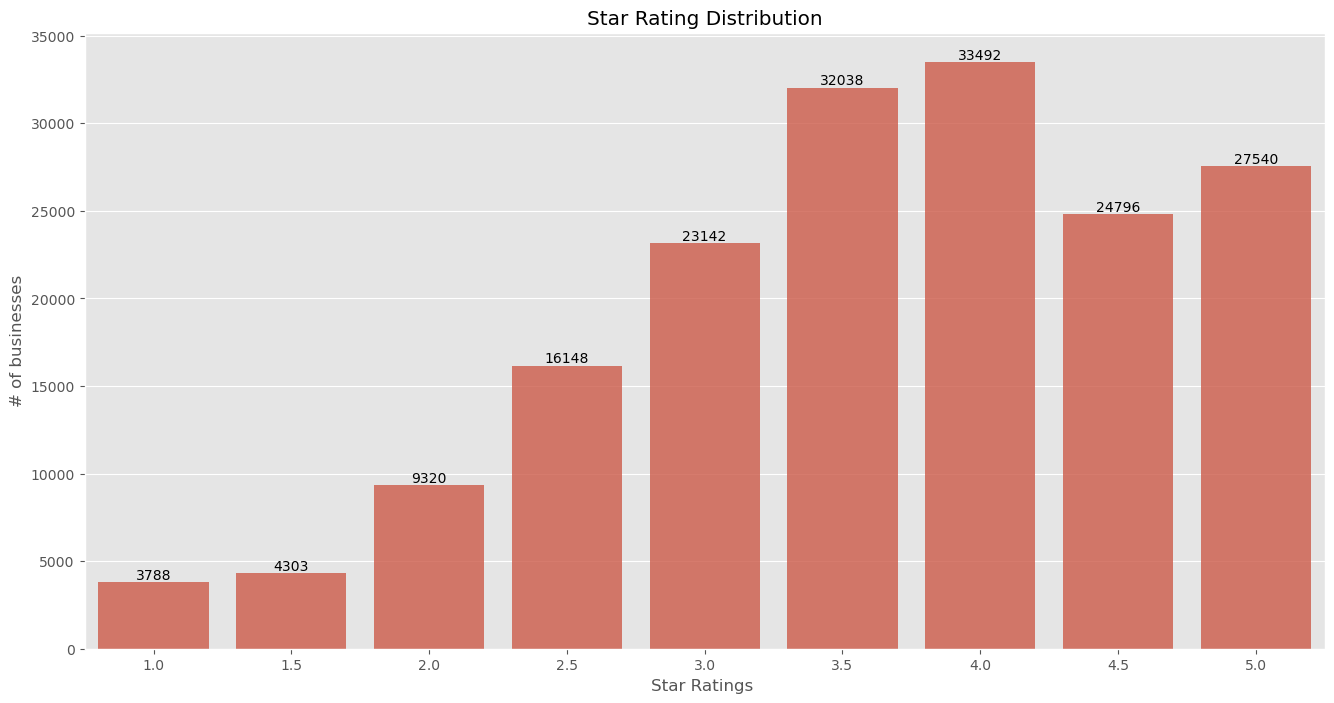

In [90]:
# Obtain the distribution of star ratings
x = business['stars'].value_counts()   
x = x.sort_index()   

# Plot bar chart
plt.figure(figsize=(16,8))   
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)   
plt.title("Star Rating Distribution")  
plt.ylabel('# of businesses', fontsize=12)  
plt.xlabel('Star Ratings ', fontsize=12)   

# Add label text
rects = ax.patches    
labels = x.values    
for rect, label in zip(rects, labels):   
    height = rect.get_height()    
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')  

plt.show()   # Display the figure

It can be seen that most restaurants are being rated between 3.5-4 stars, indicating that most consumers have a relatively satisfactory dining experience at retaurants. The number of restaurants rated 5 stars is the third largest, which means when consumers have an excellent exprience at a restaurant, they tend to give full stars(5 stars) to them, giving these restaurants more exposure and profit opportunities, though some shortcomings of these restaurants might be overlooked. The graph is also slightly left-skewed, meaning that most restaurants on Yelp tend to have relatively good ratings, which also indicates that Yelp does not have a harsh standard in terms of determining the ratings of restaurants, in order to give them more opportunites and bring more traffic to Yelp itself.

There are a total of 59106 different categories of business on Yelp!


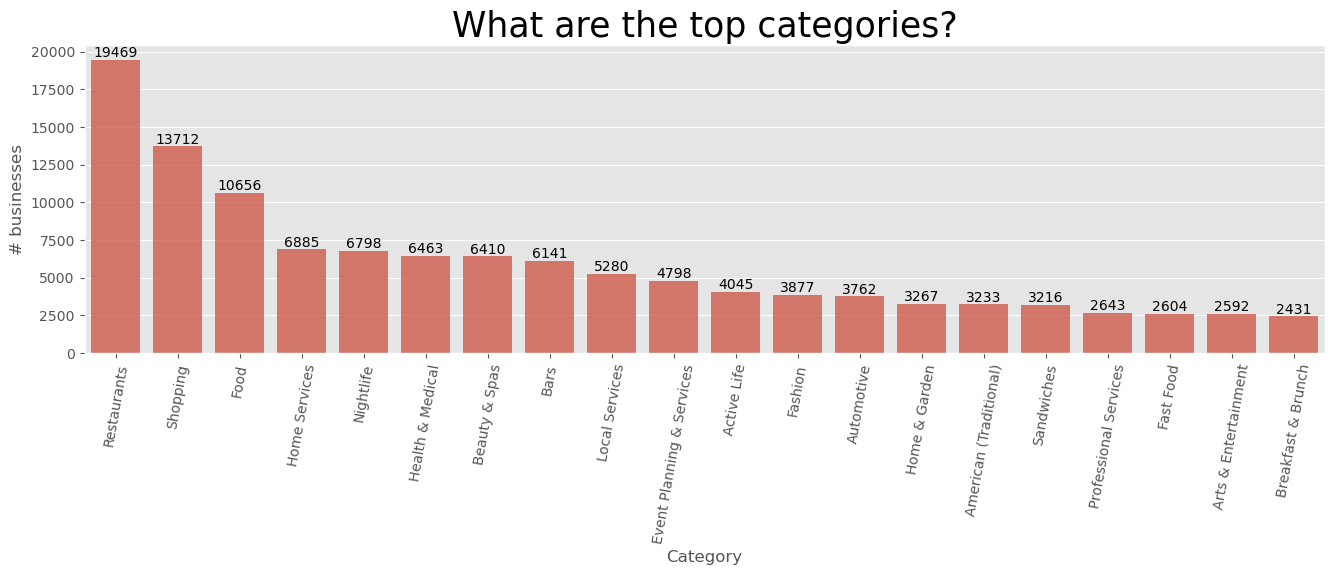

In [91]:
# Get all business categories
business_cats = ' '.join(business['categories']) 

# Split business categories into individual categories and store in DataFrame
cats = pd.DataFrame(business_cats.split(';'), columns=['category']) 
x = cats.category.value_counts() 
print("There are a total of", len(x), "different categories of business on Yelp!") 

# Prepare data for bar chart
x = x.sort_values(ascending=False) 
x = x.iloc[0:20] 

# Draw bar chart
plt.figure(figsize=(16,4)) 
ax = sns.barplot(x = x.index, y = x.values, alpha=0.8) 
plt.title("What are the top categories?", fontsize=25) 
locs, labels = plt.xticks() 
plt.setp(labels, rotation=80) 
plt.ylabel('# businesses', fontsize=12) 
plt.xlabel('Category', fontsize=12) 

# Add label text
rects = ax.patches 
labels = x.values 
for rect, label in zip(rects, labels): 
    height = rect.get_height() 
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom') 
    
plt.show()  # Display the figure

It can be seen that there is a multitude of different categories of business on Yelp, which means that Yelp coveres a wide range of industries. Among them, the top categories are restaurants, shopping, and food, which together constitute 74% of all categories on Yelp. This shows that Yelp's user base is more active in industries related to food, drink, and leisure.

# Map Visualization
## Global View

In this code, we use the Matplotlib and Basemap libraries to create a basic world map. First, we importe the required libraries. Then, we create a figure window with a specified size. Next, we apply an orthographic projection (ortho projection) to generate a globe-like version of the map. We fill the continents and oceans with the specified color codes. After that, we draw the country boundaries and use a scatter plot to mark the businesses' latitude and longitude locations on the map. Finally, we add a title to the map and displayed it.

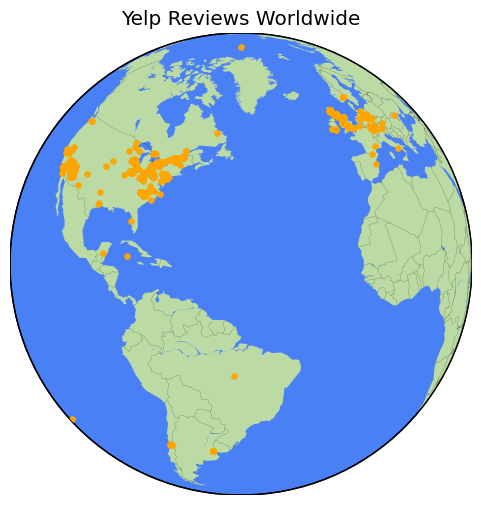

In [113]:
# Import necessary libraries
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create a figure window with a specified size
plt.figure(1, figsize=(15,6))

# Use orthographic projection (ortho projection) to create a globe-like map
m1 = Basemap(projection='ortho', lat_0=20, lon_0=-50)

# Fill continents and oceans with specified colors
m1.fillcontinents(color='#bbdaa4', lake_color='#4a80f5')

# Add ocean boundary with the specified color
m1.drawmapboundary(fill_color='#4a80f5')

# Draw country boundaries with specified width and color
m1.drawcountries(linewidth=0.1, color="black")

# Plot business longitude/latitude points on the map as scatter points
mxy = m1(business["longitude"].tolist(), business["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="orange", lw=3, alpha=1, zorder=5)

# Add title to the map
plt.title("Yelp Reviews Worldwide")

# Show the map
plt.show()

We can see from the world map that globally, businesses are concentrated in North America and Europe. The reason for it might be that Yelp was founded in America, so it first expanded its market in America, and therefore the North America data is more concentrated. Next, we are going to show the map of North America and Europe to see which cities stand out.

## North America and Europe

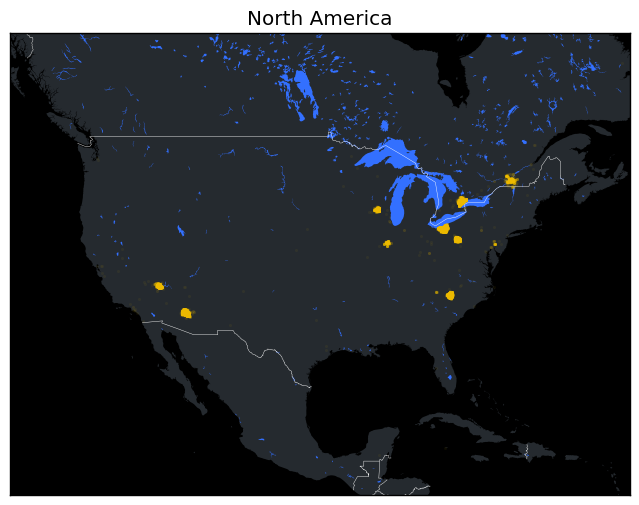

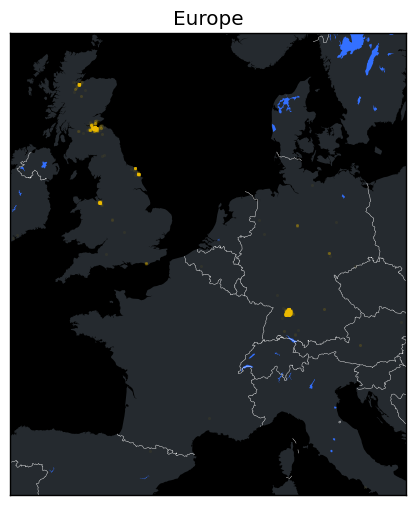

In [92]:
# Filter dataset for North America
lon_min, lon_max = -132.714844, -59.589844
lat_min, lat_max = 13.976715, 56.395664

# Create filter
idx_NA = (business["longitude"] > lon_min) & \
         (business["longitude"] < lon_max) & \
         (business["latitude"] > lat_min) & \
         (business["latitude"] < lat_max)

# Apply filter to get subset of data
NA_business = business[idx_NA]

# Initialize map
plt.figure(figsize=(12, 6))
m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')
m2.fillcontinents(color='#252a2f', lake_color='#3370ff') 
m2.drawmapboundary(fill_color='#000000') 
m2.drawcountries(linewidth=0.3, color="w") 

# Plot data
mxy = m2(NA_business["longitude"].tolist(), NA_business["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c="#ffcc00", lw=0, alpha=0.05, zorder=5)
plt.title("North America")

# Filter dataset for Europe
lon_min, lon_max = -8.613281, 16.699219
lat_min, lat_max = 40.488737, 59.204064

# Create filter
idx_euro = (business["longitude"] > lon_min) & \
           (business["longitude"] < lon_max) & \
           (business["latitude"] > lat_min) & \
           (business["latitude"] < lat_max)

# Apply filter to get subset of data
euro_business = business[idx_euro]

# Initialize map
plt.figure(figsize=(12, 6))
m3 = Basemap(projection='merc',
     llcrnrlat=lat_min,
     urcrnrlat=lat_max,
     llcrnrlon=lon_min,
     urcrnrlon=lon_max,
     lat_ts=35,
     resolution='i')
m3.fillcontinents(color='#252a2f', lake_color='#3370ff') 
m3.drawmapboundary(fill_color='#000000') 
m3.drawcountries(linewidth=0.3, color="w") 

# Plot data
mxy = m3(euro_business["longitude"].tolist(), euro_business["latitude"].tolist())
m3.scatter(mxy[0], mxy[1], s=5, c="#ffcc00", lw=0, alpha=0.05, zorder=5)
plt.title("Europe")
plt.show()

The hotspots in North America are obvious (Las Vegas, Phoenix), while in Europe they are concentrated in Edinburgh and Stuttgart. In the next section, we are going to delve into these cities because their high density of businesses on the map suggests that they are key cities for Yelp data.

## City View (Las Vegas, Phoenix, Stuttgart, Edinburgh)

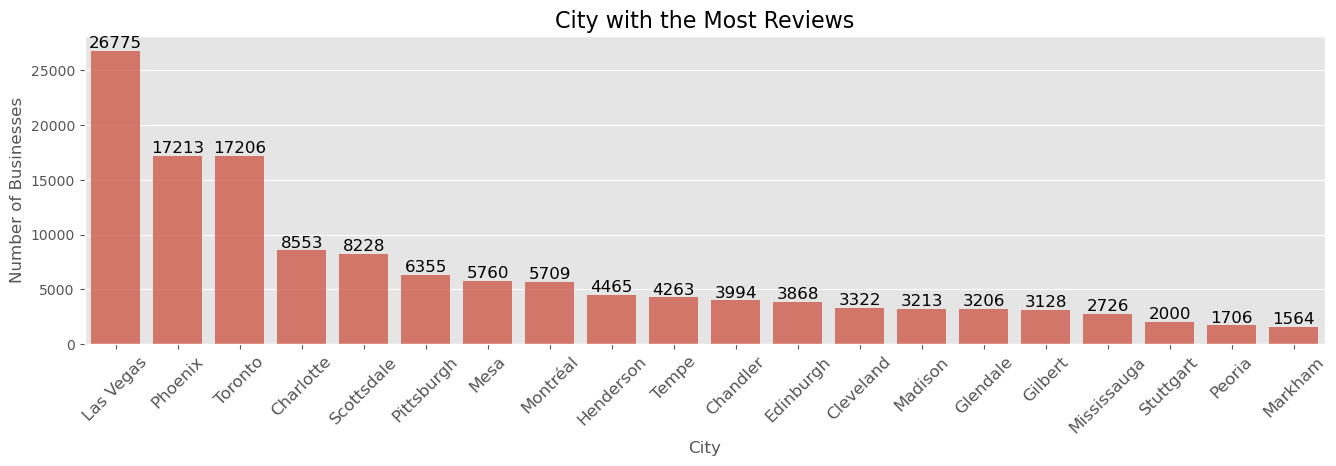

In [93]:
# Get the number of reviews per city
x = business['city'].value_counts()
x = x.sort_values(ascending=False)
x = x.iloc[0:20]

# Draw bar chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x = x.index, y = x.values, alpha=0.8) 
plt.title("City with the Most Reviews", fontsize=16) 
plt.xticks(rotation=45, fontsize=12) 
plt.ylabel('Number of Businesses', fontsize=12) 
plt.xlabel('City', fontsize=12)
rects = ax.patches 
labels = x.values 

# Add numeric labels on top of each bar
for rect, label in zip(rects, labels):
    height = rect.get_height() 
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=12) 
    
plt.show()  # Display the bar chart

The bar chart conforms to our previous conclusion as it is clear that the top cities with the most reviews are the cities in North America (Las Vegas, Phoenix, Toronto) with the largest amount of concentrated data of restaurants. The chart also shows that Yelp has the most active users in North America since there is a large number of users in North America regularly using Yelp to keep track of their dining experience.

Now, we are going to plot the latitude–longitude maps of four cities (Las Vegas, Phoenix, Stuttgart, Edinburgh) to visualize their spatial distribution.

In [94]:
# Get all business rating data
rating_data = business[['latitude','longitude','stars','review_count']].copy()
# Create a new custom variable 'popularity'; defined as rating × review count
rating_data['popularity'] = rating_data['stars'] * rating_data['review_count']

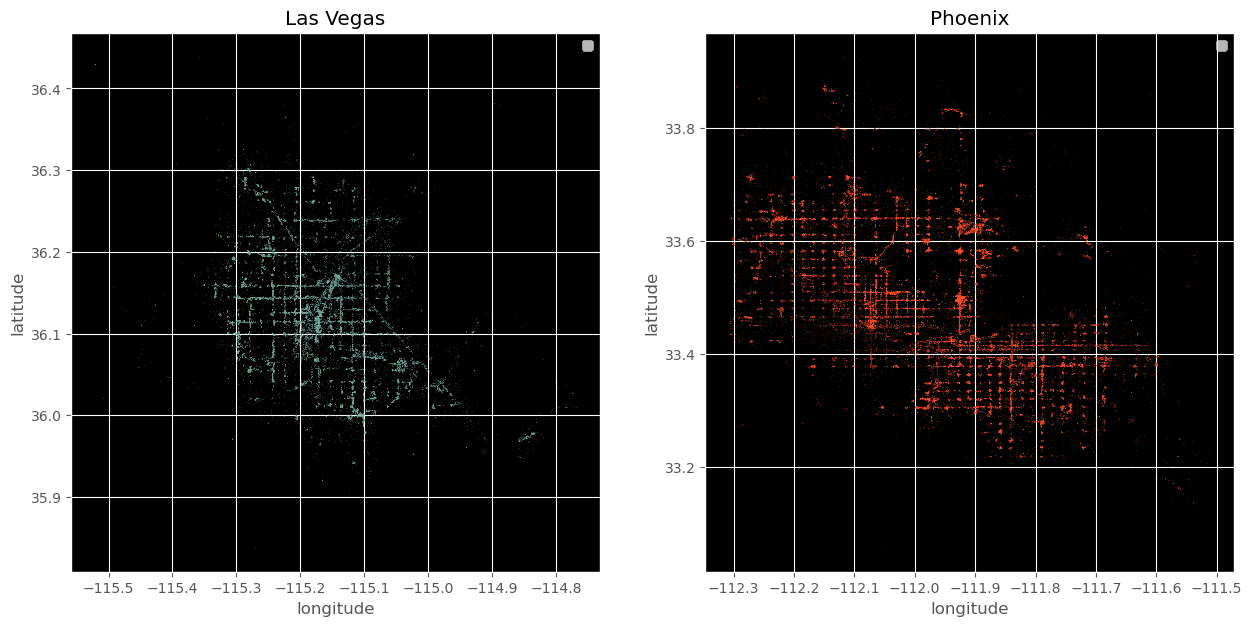

In [95]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))   # Create a figure with two subplots, set size to 15x7

# Coordinates of Las Vegas
lat = 36.207430
lon = -115.268460

# Define a suitable plotting range around Las Vegas
lon_min, lon_max = lon - 0.3, lon + 0.5
lat_min, lat_max = lat - 0.4, lat + 0.5

# Select Las Vegas businesses within the defined range
ratings_data_vegas = rating_data[(rating_data["longitude"] > lon_min) &
                                 (rating_data["longitude"] < lon_max) &
                                 (rating_data["latitude"] > lat_min) &
                                 (rating_data["latitude"] < lat_max)]

# Plot scatter plot for Las Vegas businesses
ratings_data_vegas.plot(kind='scatter', x='longitude', y='latitude', color='#74a89b', s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Las Vegas") 
ax1.set_facecolor('black')

# Coordinates of Phoenix
lat = 33.435463
lon = -112.006989

# Define a suitable plotting range around Phoenix
lon_min, lon_max = lon - 0.3, lon + 0.5
lat_min, lat_max = lat - 0.4, lat + 0.5

# Select Phoenix businesses within the defined range
ratings_data_phoenix = rating_data[(rating_data["longitude"] > lon_min) &
                                   (rating_data["longitude"] < lon_max) &
                                   (rating_data["latitude"] > lat_min) &
                                   (rating_data["latitude"] < lat_max)]

# Plot scatter plot for Phoenix businesses
ratings_data_phoenix.plot(kind='scatter', x='longitude', y='latitude', color='#fb4e29', s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Phoenix") 
ax2.set_facecolor('black') 

f.show()   # Display plots

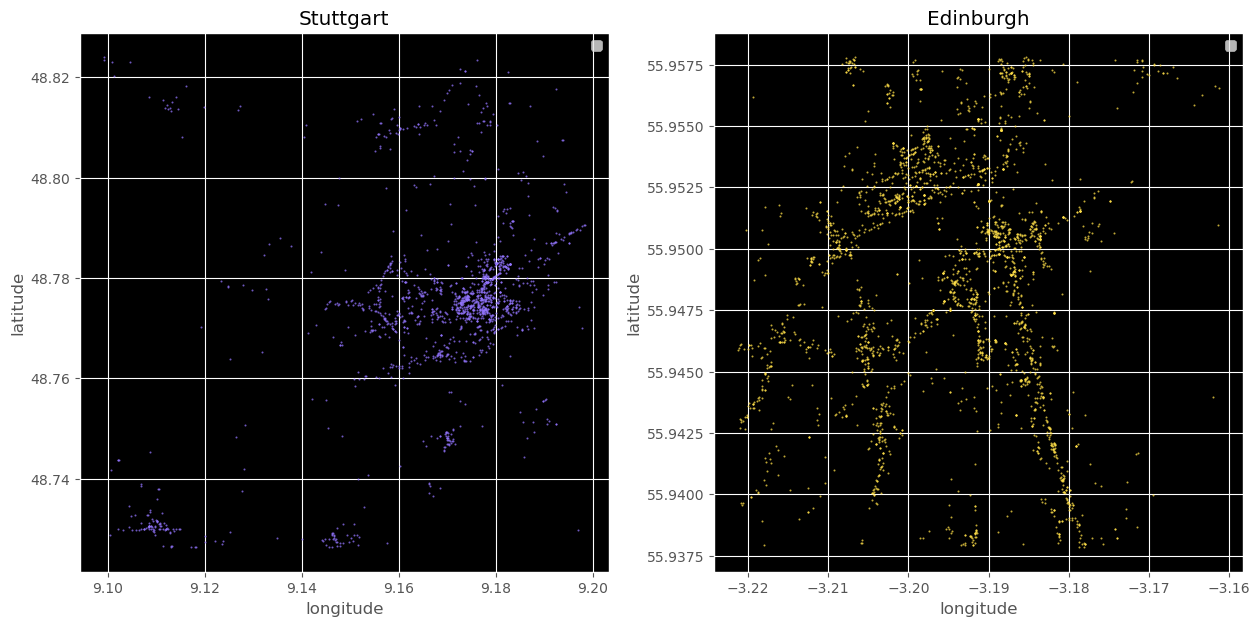

In [114]:
# Import the required plotting library
import matplotlib.pyplot as plt

# Create a figure window containing two subplots, size set to 15x7
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

# Select a point in Stuttgart city
lat = 48.775720
lon = 9.148970
# Set the longitude and latitude range to obtain the corresponding area
lon_min, lon_max = lon-0.05, lon+0.05
lat_min, lat_max = lat-0.05, lat+0.05
# Filter the rating data within Stuttgart’s region
ratings_data_stuttgart = rating_data[(rating_data["longitude"]>lon_min) & 
                                     (rating_data["longitude"]<lon_max) &
                                     (rating_data["latitude"]>lat_min) &
                                     (rating_data["latitude"]<lat_max)]

# Plot Stuttgart city scatter plot
ratings_data_stuttgart.plot(kind='scatter', x='longitude', y='latitude',
                            color='#9375fe',
                            s=1, alpha=0.6, subplots=True, ax=ax1)
ax1.set_title("Stuttgart")   
ax1.set_facecolor('black')   

# Select a point in Edinburgh city
lat = 55.947801
lon = -3.191245
# Set the longitude and latitude range to obtain the corresponding area
lon_min, lon_max = lon-0.03, lon+0.03
lat_min, lat_max = lat-0.01, lat+0.01
# Filter the rating data within Edinburgh’s region
ratings_data_edinburgh = rating_data[(rating_data["longitude"]>lon_min) &
                                     (rating_data["longitude"]<lon_max) &
                                     (rating_data["latitude"]>lat_min) &
                                     (rating_data["latitude"]<lat_max)]

# Plot Edinburgh city scatter plot
ratings_data_edinburgh.plot(kind='scatter', x='longitude', y='latitude',
                            color='#ffdf49',
                            s=1, alpha=0.6, subplots=True, ax=ax2)
ax2.set_title("Edinburgh")   
ax2.set_facecolor('black')   

# Show the figure
f.show()

It is apparent that U.S. cities usually have a regular neighborhood or grid structure, meaning that user mobility patterns and consumption points are more uniform; whereas European cities have a more fluid and irregular layout, meaning that merchants and consumption behaviors are more concentrated in specific areas, such as historic city centers. Moreover, in grid-based cities, business opportunities are more evenly spread, as traffic can occur almost anywhere, making them suitable for large-scale expansion. 

While in European cities, site selection tends to prioritize landmarks or central hubs, resulting in more concentrated flows of customers. Therefore, visualizing business locations on maps not only reflects consumer behavior but also closely relates to urban planning.

# In-depth Review Analysis
## Top 10 Reviewers

Now, we identify the top-ranked users based on the number of reviews they have given. We use the Pandas library to group the reviews DataFrame by the user_id column and apply multiple aggregation functions. The results are stored in a new DataFrame called user_agg, which contains the outputs of the various aggregation operations. In this way, the review data of each user is summarized and aggregated, facilitating further statistical analysis and visualization.

In [22]:
user_agg=reviews.sample(100000).groupby('user_id').agg(
            {'review_id':['count'],
             'date':['min','max'],
             'useful':['sum'],
             'funny':['sum'],
             'cool':['sum'],
             'stars':['mean']})

In [23]:
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print(" Top 10 Users in Yelp")
user_agg.head(10)

 Top 10 Users in Yelp


review_id        date             useful funny cool  \
                           count         min         max    sum   sum  sum   
user_id                                                                      
CxDOIDnH8gp9KXzpBHJYXw        64  2009-11-25  2017-08-05    206    92  116   
bLbSNkLggFnqwNNzzq-Ijw        49  2013-05-02  2017-12-05    521   313  374   
DK57YibC5ShBmqQl97CKog        35  2008-11-03  2017-06-13    284   142  229   
QJI9OSEn6ujRCtrX06vs1w        30  2007-03-21  2013-12-11    264   435  160   
62GNFh5FySkA3MbrQmnqvg        25  2008-12-20  2017-06-30     81    32   31   
dt9IHwfuZs9D9LOH7gjNew        22  2009-03-24  2013-12-31     57    42   41   
ELcQDlf69kb-ihJfxZyL0A        22  2012-07-17  2017-06-11     36    27   18   
cMEtAiW60I5wE_vLfTxoJQ        22  2011-01-14  2017-01-16     36    15   36   
WeVkkF5L39888IPPlRhNpg        22  2012-06-01  2017-10-07    152    96  116   
d_TBs6J3twMy9GChqUEXkg        22  2011-03-26  2017-09-09     37    19   26   

                           stars  
                            mean  
user_id                           
CxDOIDnH8gp9KXzpBHJYXw  3.156250  
bLbSNkLggFnqwNNzzq-Ijw  3.306122  
DK57YibC5ShBmqQl97CKog  3.685714  
QJI9OSEn6ujRCtrX06vs1w  3.766667  
62GNFh5FySkA3MbrQmnqvg  3.520000  
dt9IHwfuZs9D9LOH7gjNew  3.863636  
ELcQDlf69kb-ihJfxZyL0A  2.909091  
cMEtAiW60I5wE_vLfTxoJQ  4.136364  
WeVkkF5L39888IPPlRhNpg  3.863636  
d_TBs6J3twMy9GChqUEXkg  3.636364

We can see that the top 10 users contribute a lot of comments and therefore are highly active users. They are also more likely to get useful/funny/cool votes.

## Tracking Top-rated Users

Now we track the top-ranked users from the review dataset. To achieve this, we create a map of all the places they visited in chronological order, and then generate a heatmap animation from it.

In [25]:
# Track a top user:
top_user_reviews = reviews[reviews['user_id'] == 'CxDOIDnH8gp9KXzpBHJYXw']

# Get the business location information of the top user’s reviews
top_user_locs = pd.merge(top_user_reviews, business, on='business_id')

# Get the unique date list of the top user’s reviews
date_list = list(top_user_locs['date'].unique())

# Reorganize data into the format required by the Folium library
data = []
for date in date_list:
    subset = top_user_locs[top_user_locs['date'] == date]
    df = subset[['latitude', 'longitude', 'date']]
    data.append(subset[['latitude', 'longitude']].values.tolist())

In [115]:
# Initialize the map, set the starting location to Ontario, Canada, and set initial zoom level to 9
lat = 43.860397
lon = -79.303184
zoom_start = 9
print(" Stalking the top User ")

# Create a base map object using the Cartodb Positron tile style, setting initial location and zoom level
m = folium.Map(location=[lat, lon], tiles="Cartodb Positron", zoom_start=zoom_start)

# Create a time-enabled heatmap object, passing data and other parameters
from folium import plugins
hm = plugins.HeatMapWithTime(data, max_opacity=0.3, auto_play=True, display_index=True)
hm.add_to(m) 

m   # Display the map

 Stalking the top User 


From the map, we can observe the distribution pattern of this user’s activity area. The reviews are mainly concentrated in Toronto, which coincides with business-dense and highly competitive commercial districts. Yelp can regard this user as a Key Opinion Leader (KOL) and use the trajectory data for targeted marketing and personalized promotions, therefore improving conversion rates.

# Sentiment Analysis
Next, we import the TextBlob library and perform sentiment polarity scoring on reviews from elite users and regular users, respectively. We then examine the distribution of keywords whose polarity exceeds 0.25 or falls below −0.25, and construct word clouds.

[User counts]
 is_elite
False    1265282
True       60818
Name: count, dtype: int64

[Number of reviews by type in 2012 (after merge)]
 is_elite
False    228261
True     122120
Name: count, dtype: int64


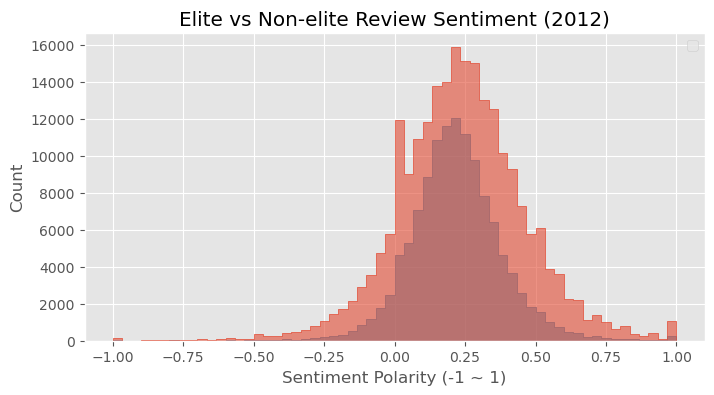


[Final sample size used for plotting]
is_elite
False    228261
True     122120
Name: count, dtype: int64


In [124]:
from textblob import TextBlob

# Standardize date format
if not pd.api.types.is_datetime64_any_dtype(reviews.get('date')):
    reviews['date'] = pd.to_datetime(reviews['date'], errors='coerce')

# Generate a unified "is_elite" flag (robust version)
elite_raw = user['elite'].astype(str).str.strip().str.lower()
is_elite = ~elite_raw.isin(['', 'none', 'nan', 'null'])  
has_year = elite_raw.str.contains(r'\d', regex=True)
user = user.assign(is_elite = is_elite & has_year)

print('[User counts]\n', user['is_elite'].value_counts(dropna=False))

# Merge reviews with users and filter by year 
df = reviews.merge(user[['user_id','is_elite']], on='user_id', how='inner')

YEAR = 2012  
df_year = df[df['date'].dt.year == YEAR].copy()

print(f'\n[Number of reviews by type in {YEAR} (after merge)]\n', df_year['is_elite'].value_counts(dropna=False))

# If one category is 0, temporarily expand to a year range
if df_year['is_elite'].value_counts().reindex([False,True], fill_value=0).min() == 0:
    df_year = df[df['date'].dt.year.between(YEAR-1, YEAR+1, inclusive='both')].copy()
    print(f'\n No data for one category in {YEAR}, temporarily expanded to {YEAR-1}–{YEAR+1}:')
    print(df_year['is_elite'].value_counts(dropna=False))

# Calculate sentiment polarity 
df_year['polarity'] = df_year['text'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot comparison 
STAT_MODE = 'count'   
BINS = 60
RANGE = (-1, 1)

fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(
    data=df_year, x='polarity', hue='is_elite',
    bins=BINS, binrange=RANGE,
    stat=STAT_MODE, common_norm=False,
    element='step', alpha=0.6, ax=ax
)
ax.set_xlabel('Sentiment Polarity (-1 ~ 1)')
ax.set_ylabel('Count' if STAT_MODE=='count' else 'Density')
title_year = f'{YEAR}' if df_year["date"].dt.year.nunique()==1 else f'{df_year["date"].dt.year.min()}–{df_year["date"].dt.year.max()}'
ax.set_title(f'Elite vs Non-elite Review Sentiment ({title_year})')

handles, labels = ax.get_legend_handles_labels()
label_map = {'False':'Non-elite', 'True':'Elite'}
labels = [label_map.get(lb, lb) for lb in labels]
ax.legend(handles=handles, labels=labels, title='')
plt.show()

print('\n[Final sample size used for plotting]')
print(df_year['is_elite'].value_counts(dropna=False))

In [100]:
def senti_word_cloud(s,max_words = 200):
    import matplotlib
    from wordcloud import WordCloud
    matplotlib.rcParams['figure.figsize'] = (20,10)
    # color_mask =imageio.imread("1.png")
    wc1 = WordCloud(background_color="black", 
                    max_words=max_words, 
                    width=1920, height=1080
                   ) 
    wc2 = WordCloud(background_color="white", 
                    max_words=max_words, 
                    width=1920, height=1080
                   ) 
    positivelist = []
    negativelist = []
    
    from textblob import TextBlob
    for each in s:
        each_word = TextBlob(each)
        feeling = each_word.sentiment.polarity
        if feeling > 0.25:
            positivelist.append(each)
        elif feeling < -0.25:
            negativelist.append(each)
        else:
            pass

    # Combine positive and negative word lists into strings (words separated by spaces)
    positive_string = " ".join(positivelist)
    negative_string = " ".join(negativelist)
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    wc1.generate(negative_string)
    axes[0].imshow(wc1, interpolation='bilinear')
    axes[0].set_title('Negative')
    axes[0].axis('off')
    
    wc2.generate(positive_string)
    axes[1].imshow(wc2, interpolation='bilinear')
    axes[1].set_title('Positive')
    axes[1].axis('off')
    
    plt.show()

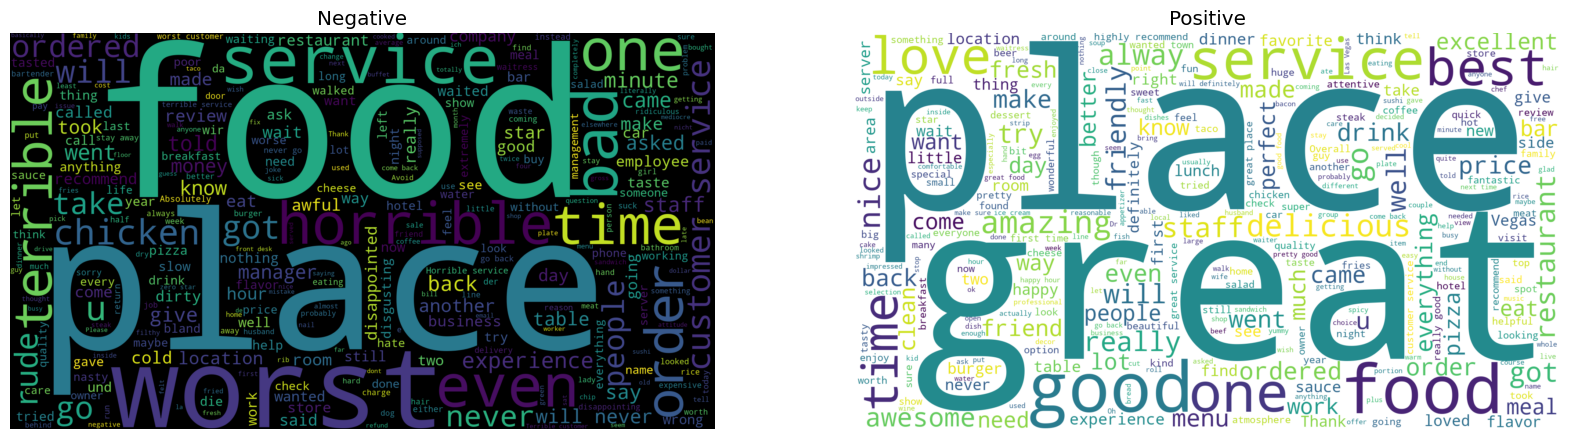

In [81]:
senti_word_cloud(reviews['text'].sample(20000), max_words=300)

The difference in the number of reviews between the two types of users is significant: non-elite users contribute significantly more reviews. In terms of distribution, the polarity of elite users' reviews is more concentrated in the positive region (0 ~ 0.5), indicating that they are more inclined to write positive reviews.  While the distribution of non-elite users' reviews is more dispersed, both positive and negative, with greater overall sentiment fluctuations.

The word ‘place’ appears frequently in both the positive and negative word clouds. In the positive word cloud, terms such as ‘good’, ‘great’, and ‘best’ occur often, whereas in the negative word cloud, common complaint words like ‘worst’ and ‘horrible’ appear more frequently.

# Check-in Data

In [34]:
def highlight_max(data, color='yellow'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:   # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:   # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''), index=data.index, columns=data.columns)

In [107]:
#checkins exploration

# Group check-in data by 'weekday' and 'hour', and calculate the sum of 'checkins' in each group
df = check_in.groupby(['weekday', 'hour'])['checkins'].sum()

# Reset index, convert the grouped result into a DataFrame
df = df.reset_index()

# Use 'hour' as row index and 'weekday' as column index, with 'checkins' as values to create a DataFrame
df = df.pivot(index='hour', columns='weekday')[['checkins']]

# Drop redundant column level
df.columns = df.columns.droplevel()

# Reset index again
df = df.reset_index()

# Process the 'hour' column, convert values into integer type
# Here, lambda and split are used to remove the minutes part from time strings
df.hour = df.hour.apply(lambda x: str(x).split(':')[0])
df.hour = df.hour.astype(int)

# Sort values by the 'hour' column
df = df.sort_values('hour')

# Reorder columns, move 'hour' to the first column
df = df[['hour', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]

# Create a color palette
cm = sns.light_palette("orange", as_cmap=True)

# Use custom function highlight_max to highlight the maximum value in each column, with blue color
df.style.apply(highlight_max, color='#679bff', axis=0)

From the total number of check-ins, we can see that activity levels are significantly higher on weekends compared to weekdays. In the evening (6pm – 0am), there is a clear peak in check-ins, which aligns with after-work, social, and entertainment activities. A smaller peak also appears during the daytime (around 11am), likely corresponding to morning coffee breaks.

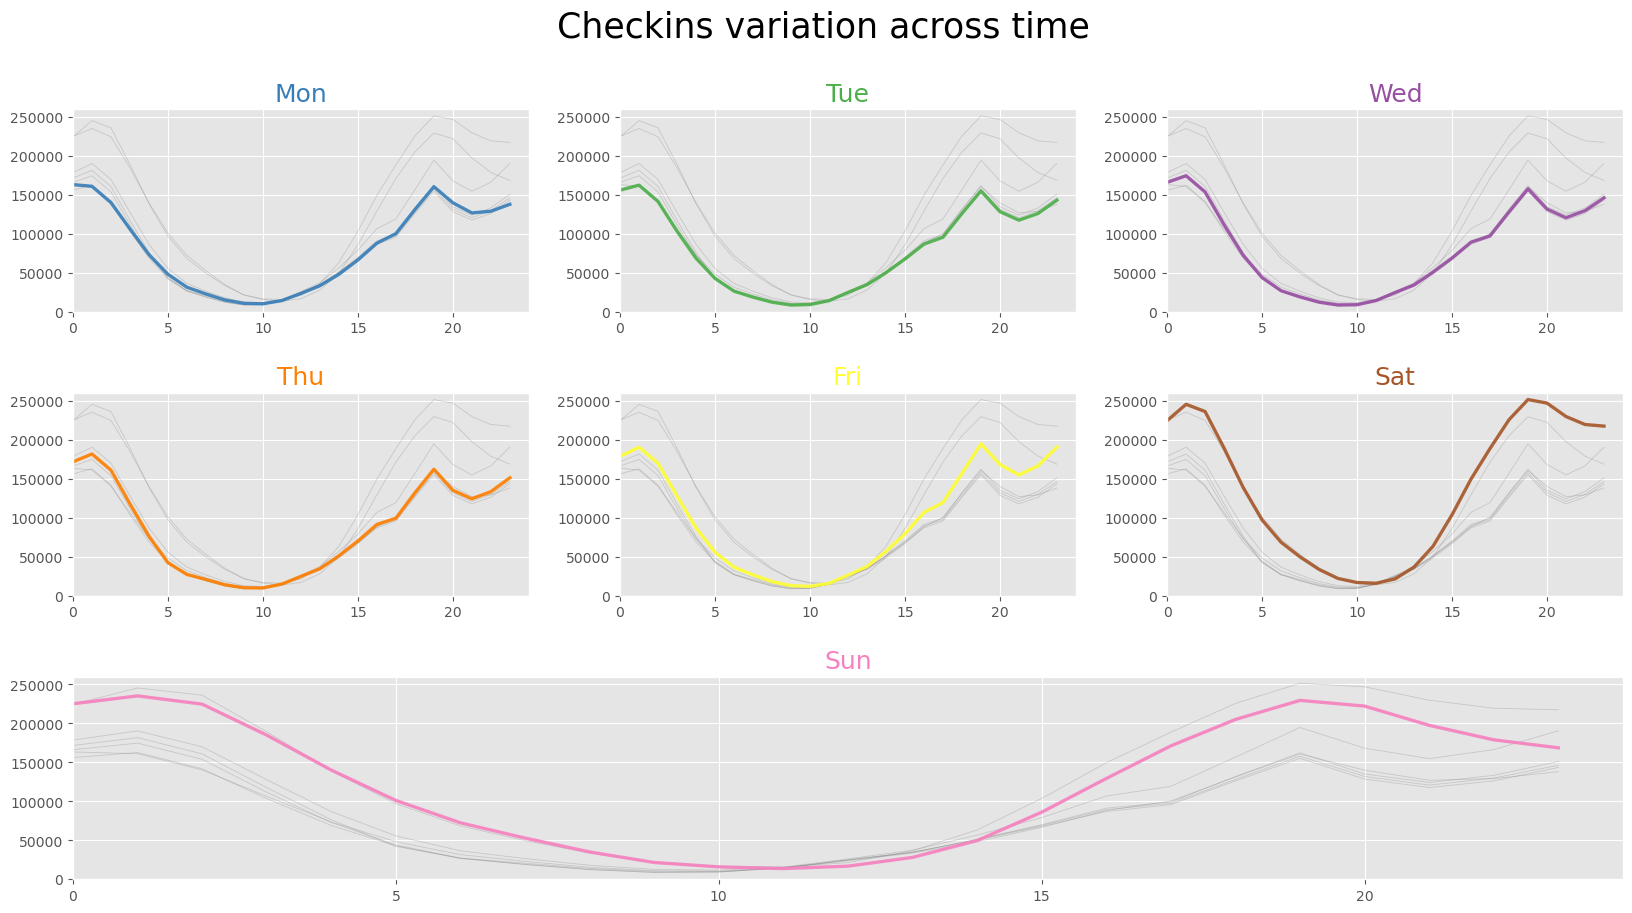

In [110]:
import matplotlib.gridspec as gridspec

# Use 'ggplot' style for the plots
plt.style.use('ggplot')

# Create a color palette (Set1 colormap)
palette = plt.get_cmap('Set1')

# Create a figure with size 20x10
plt.figure(figsize=(20,10))

# Add a super title for the entire figure
plt.suptitle("Checkins variation across time", fontsize=25)

# Define a 3x3 grid layout for subplots
gridspec.GridSpec(3,3)

# Adjust vertical spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Initialize subplot counter
num = 0

# Loop through each weekday column (excluding 'hour')
for column in df.drop('hour', axis=1):
    num += 1

    # Place Sunday subplot across the entire bottom row
    if num == 7: 
        plt.subplot2grid((3,3), (2,0), colspan=3)
    else:
        # Create subplot in the 3x3 grid
        plt.subplot(3,3, num)
    
    # Plot all other weekdays in grey as background reference
    for v in df.drop('hour', axis=1):
        plt.plot(df['hour'], df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
    
    # Highlight the current weekday with a distinct color
    plt.plot(df['hour'], df[column], marker='', color=palette(num), 
             linewidth=2.4, alpha=0.9, label=column)
    
    # Set x-axis range (hours of the day)
    plt.xlim(0,24)
    
    # Set y-axis range (check-in counts)
    plt.ylim(-2,260000)
    
    # Hide bottom tick labels for the first row of subplots
    if num in range(4):
        plt.tick_params(labelbottom='off')
    
    # Hide left tick labels for subplots except the first column
    if num not in [1,4,7]:
        plt.tick_params(labelleft='off')
    
    # Set subplot title (weekday name)
    plt.title(column, loc='center', fontsize=18, fontweight=0, color=palette(num))

The graph confirms our earlier observations. It shows that the evening hours (6pm – 1am) are the most active period of the day, which matches our dining, entertainment, and nightlife consumption habits. In contrast, activity is lowest around midday. Check-in numbers are also clearly higher on weekends than on weekdays, indicating that users are most active during weekends.

# User Network (Relationship, Global Graph)
The user table contains each user and their list of friends, which can be used to construct a user network graph.

In [111]:
# Select a subset of users who have at least one friend
subset_users = user[user['friends'] != 'None']

# Select a subset of users with at least 10 reviews
subset_users = subset_users[subset_users['review_count'] >= 10]

# Split the values in the "friends" column and create a new column "list_friends"
subset_users['list_friends'] = subset_users["friends"].apply(lambda x: str(x).split(','))

# Keep only the "user_id" and "list_friends" columns
subset_users = subset_users[['user_id','list_friends']]

# Limit the DataFrame to the first 6000 rows due to memory constraints
subset_users = subset_users.iloc[0:6000]

# Set "user_id" as the index and expand "list_friends" values into multiple rows
res = subset_users.set_index(['user_id'])['list_friends'].apply(pd.Series).stack()

In [42]:
network_data=res.reset_index()
network_data.tail()

user_id  level_1                        0
651588  N0ZkwirFkd_kwp05ymeYkQ      114   3MH98JxTJ4DaSy6bPkj-ng
651589  N0ZkwirFkd_kwp05ymeYkQ      115   p3ZDh00RLio8itC5a07lPg
651590  N0ZkwirFkd_kwp05ymeYkQ      116   ZAc5vMMYLgyYqgjHXGce3Q
651591  N0ZkwirFkd_kwp05ymeYkQ      117   25NDlYy0wzjq7mh3IiCp0Q
651592  N0ZkwirFkd_kwp05ymeYkQ      118   lJix8dFRFk4WvVpdRTyC0g

Number of nodes: 7061
Number of edges: 5000
Density of the graph: 0.0002005991495398456


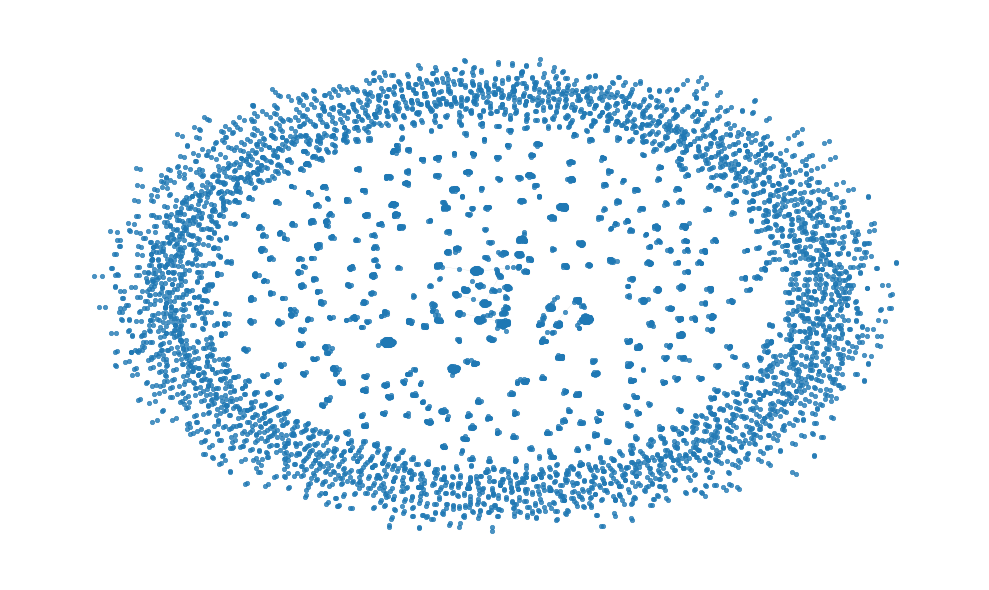

In [112]:
import networkx as nx
import matplotlib.pyplot as plt

# Fix the sampling to ensure the same batch is drawn each time
sampled = network_data.sample(5000, random_state=0)

# Build the graph from the sampled data
graph = nx.from_pandas_edgelist(sampled, source='source', target='target')

# Fix the layout seed to ensure reproducibility
pos = nx.spring_layout(graph, seed=0, iterations=50)

# Print basic graph information
print("Number of nodes:", graph.number_of_nodes())
print("Number of edges:", graph.number_of_edges())
print("Density of the graph:", nx.density(graph))

# Draw the graph with small nodes, faint edges, no axis, and tight layout
plt.figure(figsize=(10,6))
nx.draw_networkx_nodes(graph, pos, node_size=10, alpha=0.8)
nx.draw_networkx_edges(graph, pos, width=0.2, alpha=0.15)
plt.axis('off')
plt.tight_layout()
plt.show()

The graph is very sparse, with a density of only 0.0002, which indicates that most users have limited social connections. In other words, Yelp is primarily used for searching and posting business reviews, rather than for social networking.

# Conclusion
Overall, this report leads to the following conclusions:

1. The distribution of restaurant star ratings on Yelp skews high, reflecting a tendency among users to give positive and top ratings.
2. In terms of geographic distribution, the US remains Yelp’s primary active market, while other regions (e.g., Europe) show limited numbers of businesses and reviews.
3. Yelp user behavior exhibits a “head effect”: a small number of elite users contribute a large share of reviews, and they also receive significantly more useful/funny/cool votes compared to other users.
4. Yelp users are highly active during evening hours(6pm – 1am) and on weekends. Both Yelp and businesses should focus content delivery and marketing strategies on these peak periods.
5. The user relationship network is sparse, with most users having few friends. Therefore, identifying Key Opinion Leaders(KOLs) is critical for platform operations and business promotion.